In [1]:
import numpy as np 
import george
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
#change the plot styling
sns.set_context("talk",font_scale=1.5)

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
gp_path = '/Users/alexgagliano/Documents/Research/TransientRecommender/superraenn/products/'

data = np.load(gp_path + '/lcs_2022-01-30.npz', allow_pickle=True)
lst = data.files

In [11]:
np.shape(data['lcs'])

(30000,)

In [23]:
data = np.load(gp_path + '/model_2022-01-31.sav', allow_pickle=True)

lst = data.files
#len(data['bandmin'])#

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexgagliano/Documents/Research/TransientRecommender/superraenn/products//model_2022-01-31.sav'

In [5]:
fn = "MLAG_GP_ELASTICC_50k_NONIaMODEL0-0001_SN1110783.DAT"#%one.name
lcpath = "/Users/alexgagliano/Documents/Research/TransientRecommender/superraenn/lcs_biggerlist/"
trueLC = pd.read_csv(lcpath + fn, 
                     skiprows=85, 
                     delim_whitespace=True)

In [149]:
from superraenn.preprocess import read_in_LC_files
from superraenn.preprocess import read_in_meta_table
from astropy.cosmology import Planck13 as cosmo

if False: 
    objs, redshifts, obj_types, peaks, ebvs = read_in_meta_table("sn_bigger_list.txt")

    # Grab all the LC files in the input directory
    file_names = []
    for obj in objs:
        file_name = "lcs_biggerlist/" + 'MLAG_GP_ELASTICC_50k_NONIaMODEL0-0001_SN' + obj + '.DAT'
        file_names.append(file_name)

    lc_list = read_in_LC_files(file_names, objs)

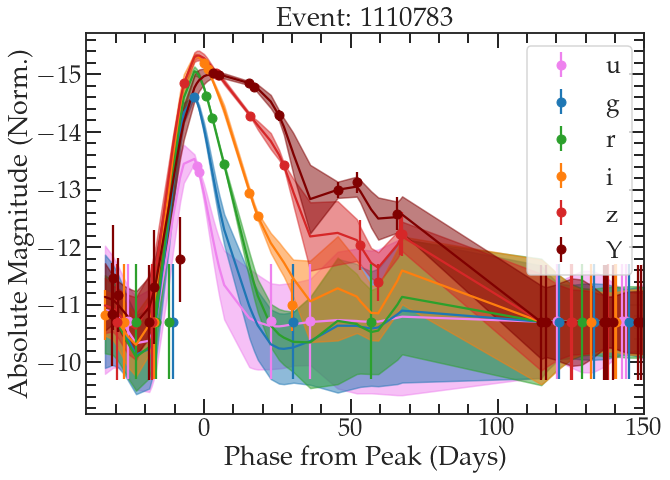

In [158]:
#literally do everything from scratch
if False:
    filt_dict = filt_dict = {'u':0, 'g': 1, 'r': 2, 'i': 3, 'z': 4, 'Y':5}
    wvs = np.asarray([3600, 4760, 6215, 7545, 8700, 10150])
    ZPT = 30.0
    Z = redshifts[5]
    LM = 33.5

    lc_list[5].add_LC_info(zpt=ZPT, mwebv=ebvs[5],
                      redshift=Z, lim_mag=LM,
                      obj_type=obj_types[5])
    lc_list[5].get_abs_mags()
    lc_list[5].sort_lc()
    pmjd = lc_list[5].find_peak(peaks[5])
    lc_list[5].shift_lc(pmjd)
    lc_list[5].correct_time_dilation()
    lc_list[5].filter_names_to_numbers(filt_dict)
    lc_list[5].correct_extinction(wvs)
    lc_list[5].cut_lc()
    lc_list[5].make_dense_LC(len(filt_dict.keys()))
        
col_dict = {'0':'violet', '1':'tab:blue', '2':'tab:green', '3':'tab:orange', '4':'tab:red', '5':'maroon'}
filt_dict_rev = {0:'u', 1:'g', 2:'r', 3:'i', 4:'z', 5:'Y'}

plt.figure(figsize=(10,7))
for i in np.arange(6):
    idx = data['lcs'][5].filters == '%i'%i
    flux = lc_list[5].dense_lc[:,i,0]
    flux_err = lc_list[5].dense_lc[:,i,1]
    plt.plot(lc_list[5].times,flux, c=col_dict[str(i)])
    plt.fill_between(lc_list[5].times,flux-flux_err,flux+flux_err, alpha=0.5, color=col_dict[str(i)])
    plt.errorbar(lc_list[5].times[idx], lc_list[5].abs_mags[idx], lc_list[5].abs_mags_err[idx], fmt='o', c=col_dict[str(i)], label=filt_dict_rev[i])
plt.gca().invert_yaxis()
plt.xlim((-40, 150))
plt.legend()
plt.xlabel("Phase from Peak (Days)")
plt.ylabel("Absolute Magnitude (Norm.)")
plt.title("Event: %s"%one.name)
plt.savefig("/Users/alexgagliano/Documents/Research/TransientRecommender/superraenn/superraenn/plots/SN%s_GPInterp.png"%one.name,dpi=220, bbox_inches='tight')

Text(0.5, 1.0, 'Event: 1110783')

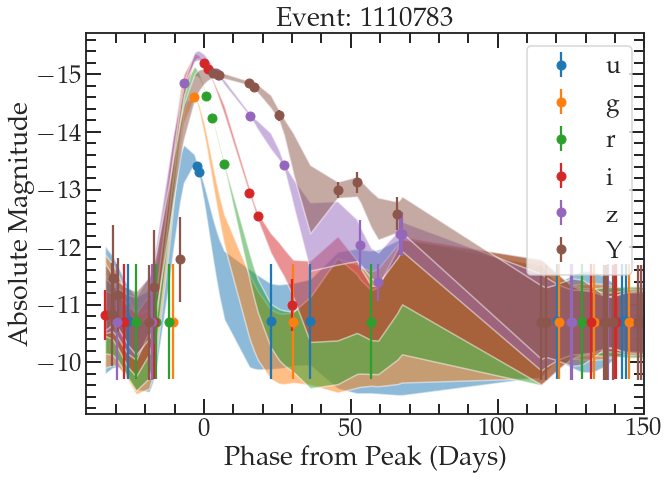

In [143]:
data = np.load(gp_path + '/lcs_2022-01-30.npz', allow_pickle=True)
one = data['lcs'][5]

plt.figure(figsize=(10,7))
for i in np.arange(6):
    idx = data['lcs'][5].filters == '%i'%i
    flux = one.dense_lc[:,i,0]
    flux_err = one.dense_lc[:,i,1]
    plt.fill_between(one.times,flux-flux_err,flux+flux_err, alpha=0.5)
    plt.errorbar(one.times[idx], one.abs_mags[idx], one.abs_mags_err[idx], fmt='o', label=filt_dict_rev[i])
plt.gca().invert_yaxis()
plt.xlim((-40, 150))
plt.legend()
plt.xlabel("Phase from Peak (Days)")
plt.ylabel("Absolute Magnitude")
plt.title("Event: %s"%one.name)

/Users/alexgagliano/miniconda3/envs/host_classifier/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(50.0, 20.0)

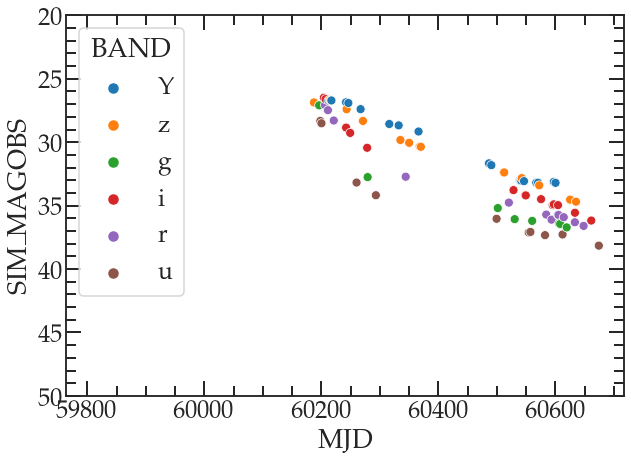

In [113]:
plt.figure(figsize=(10,7))
sns.scatterplot(trueLC['MJD'], trueLC['SIM_MAGOBS'], hue=trueLC['BAND'])
plt.ylim((50, 20))

/Users/alexgagliano/miniconda3/envs/host_classifier/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MJD', ylabel='FLUXCAL'>

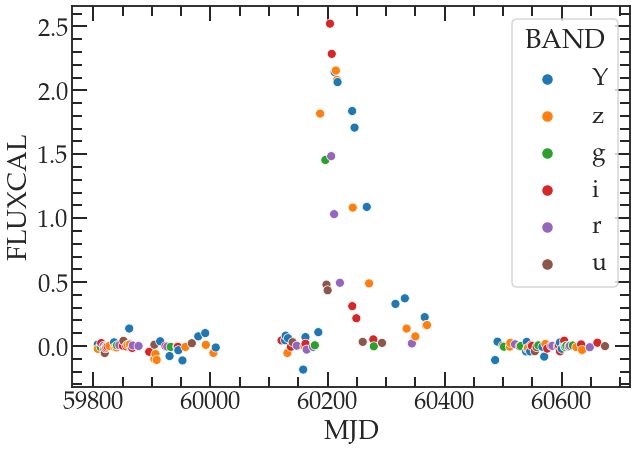

In [107]:
plt.figure(figsize=(10,7))
sns.scatterplot(trueLC['MJD'], trueLC['FLUXCAL'], hue=trueLC['BAND'], legend=True) #data[item][0].fluxerr,

In [116]:
len(trueLC)

142

In [118]:
np.shape(one.fluxes)

(93,)

In [119]:
one.name

'1110783'

In [ ]:
#first calculate apparent magnitude
k_correction = 2.5 * np.log10(1.+one.redshift)
dist = cosmo.luminosity_distance([one.redshift]).value[0]  # returns dist in Mpc

self.abs_mags = -2.5 * np.log10(one.fluxes) + self.zpt - 5. * \
    np.log10(dist*1e6/10.0) + k_correction

# Sketchy way to calculate error - update later
self.abs_mags_plus_err = -2.5 * np.log10(self.fluxes + self.flux_errs) + self.zpt - 5. * \
    np.log10(dist*1e6/10.0) + k_correction
self.abs_mags_err = np.abs(self.abs_mags_plus_err - self.abs_mags)

if replace_nondetections:
    abs_lim_mag = self.lim_mag - 5.0 * np.log10(dist * 1e6 / 10.0) + \
                    k_correction
    gind = np.where((np.isnan(self.abs_mags)) |
                    np.isinf(self.abs_mags) |
                    np.isnan(self.abs_mags_err) |
                    np.isinf(self.abs_mags_err) |
                    (self.abs_mags > self.lim_mag))

    self.abs_mags[gind] = abs_lim_mag
    self.abs_mags_err[gind] = mag_err_fill
self.abs_lim_mag = abs_lim_mag

return self.abs_mags, self.abs_mags_err
#then, take redshift to convert to absolute magnitude 


In [29]:
import scipy 
one = data['lcs'][5]
nfilts = 6

filt_dict = {'u':0, 'g': 1, 'r': 2, 'i': 3, 'z': 4, 'Y':5}
filt_dict_rev = {0:'u', 1:'g', 2:'r', 3:'i', 4:'z', 5:'Y'}

gp_mags = one.abs_mags - one.abs_lim_mag
dense_fluxes = np.zeros((len(one.times), nfilts))
dense_errs = np.zeros((len(one.times), nfilts))
stacked_data = np.vstack([one.times, one.filters]).T
x_pred = np.zeros((len(one.times)*nfilts, 2))
kernel = np.var(gp_mags) * george.kernels.ExpSquaredKernel([100, 1], ndim=2)
gp = george.GP(kernel)
gp.compute(stacked_data, one.abs_mags_err)

def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(gp_mags)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(gp_mags)

try:
    result = scipy.optimize.minimize(neg_ln_like,
                             gp.get_parameter_vector(),
                             jac=grad_neg_ln_like)
    gp.set_parameter_vector(result.x)
except:
    gp.set_parameter_vector([1, 100, 1])
for jj, time in enumerate(one.times):
    x_pred[jj*nfilts:jj*nfilts+nfilts, 0] = [time]*nfilts
    x_pred[jj*nfilts:jj*nfilts+nfilts, 1] = np.arange(nfilts)
pred, pred_var = gp.predict(gp_mags, x_pred, return_var=True)

for jj in np.arange(nfilts):
    gind = np.where(x_pred[:, 1] == jj)[0]
    dense_fluxes[:, int(jj)] = pred[gind] + one.abs_lim_mag
    dense_errs[:, int(jj)] = np.sqrt(pred_var[gind])
one.dense_lc = np.dstack((dense_fluxes, dense_errs))
gp.recompute()

#gp_mags
#one.gp = gp
#one.gp_mags = gp_mags

True

2022-01-30 16:20:22 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-01-30 16:20:22 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2022-01-30 16:20:22 *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for a

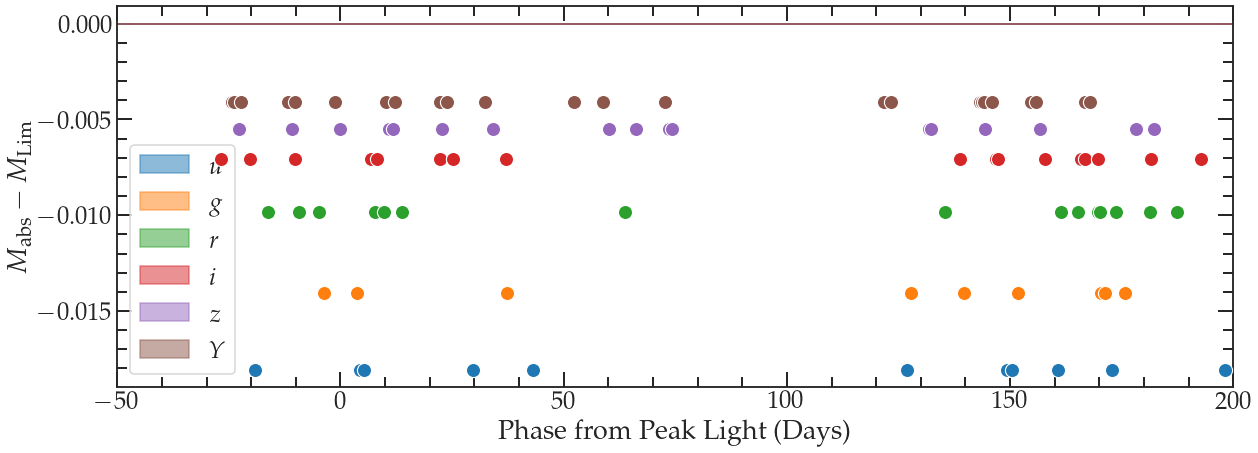

In [35]:
import scipy 
one = data['lcs'][5]
nfilts = 6

filt_dict = {'u':0, 'g': 1, 'r': 2, 'i': 3, 'z': 4, 'Y':5}
filt_dict_rev = {0:'u', 1:'g', 2:'r', 3:'i', 4:'z', 5:'Y'}

gp_mags =  one.abs_mags - one.abs_lim_mag

times = np.linspace(-50, 200, 200)

dense_fluxes = np.zeros((len(one.times), nfilts))
dense_errs = np.zeros((len(one.times), nfilts))

stacked_data = np.vstack([one.times, one.filters]).T
x_pred = np.zeros((len(times)*nfilts, 2))
kernel = np.var(gp_mags) * george.kernels.ExpSquaredKernel([100, 1], ndim=2)

gp = george.GP(kernel)
gp.compute(stacked_data, one.abs_mags_err)

def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(gp_mags)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(gp_mags)

result = scipy.optimize.minimize(neg_ln_like,
                             gp.get_parameter_vector(),
                             jac=grad_neg_ln_like)
gp.set_parameter_vector(result.x)
            
for jj, time in enumerate(times):
    x_pred[jj*nfilts:jj*nfilts+nfilts, 0] = [time]*nfilts
    x_pred[jj*nfilts:jj*nfilts+nfilts, 1] = np.arange(nfilts)
pred, pred_var = gp.predict(gp_mags, x_pred, return_var=True)

DF = pd.DataFrame({'Phase':x_pred[:,0], 'Filter':x_pred[:,1], 'NormedFlux':pred, 'NormedFlux_Err':pred_var})

one_df = pd.DataFrame({'Phase':one.times, 'Filter':one.filters, 'NormedFlux':gp_mags})

DF.loc[DF['NormedFlux_Err'] > 1., 'NormedFlux_Err'] = 1.

plt.figure(figsize=(20,7))
cols = sns.color_palette("tab10", 6)
for filt in np.arange(6):
    DF_cut = DF[DF['Filter'] == filt]
    plt.fill_between(DF_cut['Phase'], DF_cut['NormedFlux']-DF_cut['NormedFlux_Err'], DF_cut['NormedFlux']+DF_cut['NormedFlux_Err'], color=cols[filt], alpha=0.5, label=r"$%s$" % filt_dict_rev[filt])
    
    data_cut = one_df[one_df['Filter'] == str(filt)]
    
    sns.scatterplot(x=data_cut['Phase'],  y=data_cut['NormedFlux'], c=cols[filt], legend=False, s=200, zorder=100) #data[item][0].fluxerr,

plt.xlabel("Phase from Peak Light (Days)")
plt.ylabel(r"$M_{\rm abs} - M_{\rm Lim}$")
plt.xlim((-50, 200))
plt.legend()
#plt.ylim((-5, 30))
#plt.savefig("./Psychadelic_GP_Prediction.png",dpi=200, bbox_inches='tight')

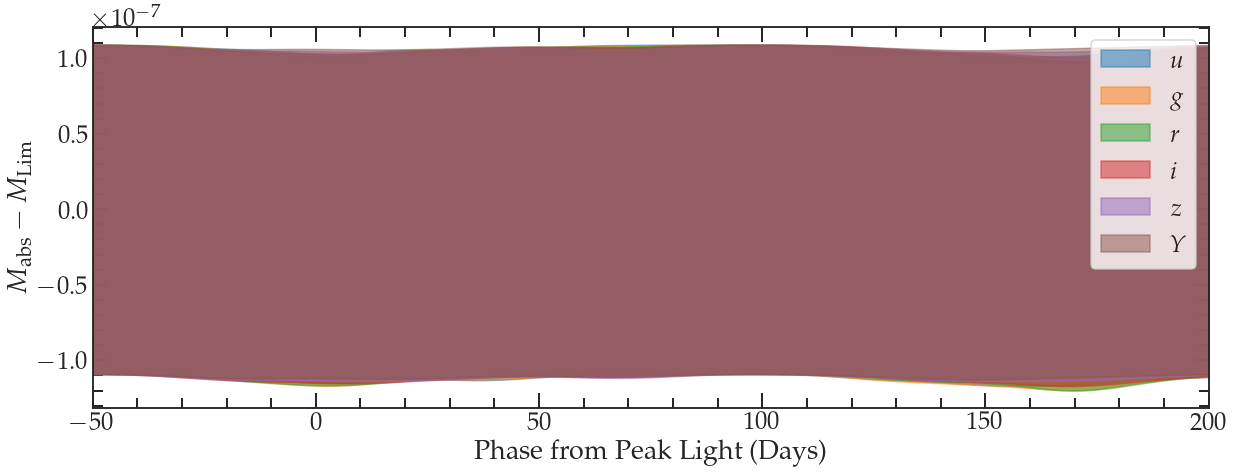

In [36]:

plt.figure(figsize=(20,7))
cols = sns.color_palette("tab10", 6)
for filt in np.arange(6):
    DF_cut = DF[DF['Filter'] == filt]
    plt.fill_between(DF_cut['Phase'], DF_cut['NormedFlux']-DF_cut['NormedFlux_Err'], DF_cut['NormedFlux']+DF_cut['NormedFlux_Err'], color=cols[filt], alpha=0.5, label=r"$%s$" % filt_dict_rev[filt])
plt.xlabel("Phase from Peak Light (Days)")
plt.ylabel(r"$M_{\rm abs} - M_{\rm Lim}$")
plt.xlim((-50, 200))
plt.legend()
#plt.savefig("./Psychadelic_GP_Prediction.png",dpi=200, bbox_inches='tight')

In [23]:
DF_cut['NormedFlux'].values

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  3.81135540e-020,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,